In [30]:
import pandas as pd
from pandas import read_csv
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Task 1: Utilize Libraries/Dataset
def load_and_explore_data(file_path):
    """
    Load the dataset and perform basic exploration

    Parameters:
    file_path (str): Path to the customer data CSV file

    Returns:
    pandas.DataFrame: The loaded customer data
    """
    # Load the dataset
    df = pd.read_csv(file_path)

    # Display the first few rows
    print("First 5 rows of the dataset:")
    print(df.head())

    # Display dataset info
    print("\nDataset Information:")
    print(df.info())

    # Display basic statistics
    print("\nBasic Statistics:")
    print(df.describe())

    return df
df = load_and_explore_data('sample_data/enhanced_diabetes_dataset.csv')

First 5 rows of the dataset:
   Age  Gender  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0   52       1            1      124           95.0           20.0        0   
1   43       1            2      144           86.0           23.0        3   
2   55       1            4      141          113.0           18.0      297   
3   68       1            3      125          110.0           32.0      210   
4   41       0            0      177           92.0           14.0      189   

    BMI  DiabetesPedigreeFunction  HbA1c  FastingBS  Triglycerides   HDL  \
0  36.0                     0.078    4.7         87          142.0  37.0   
1  32.9                     0.118    6.3        135          162.0  89.0   
2  43.4                     0.139    5.4        113          180.0  45.0   
3  22.7                     0.197    5.2         93          262.0  56.0   
4  38.1                     0.078   10.5        126          332.0  66.0   

   Smoking  PhysicalActivity  Prediabet

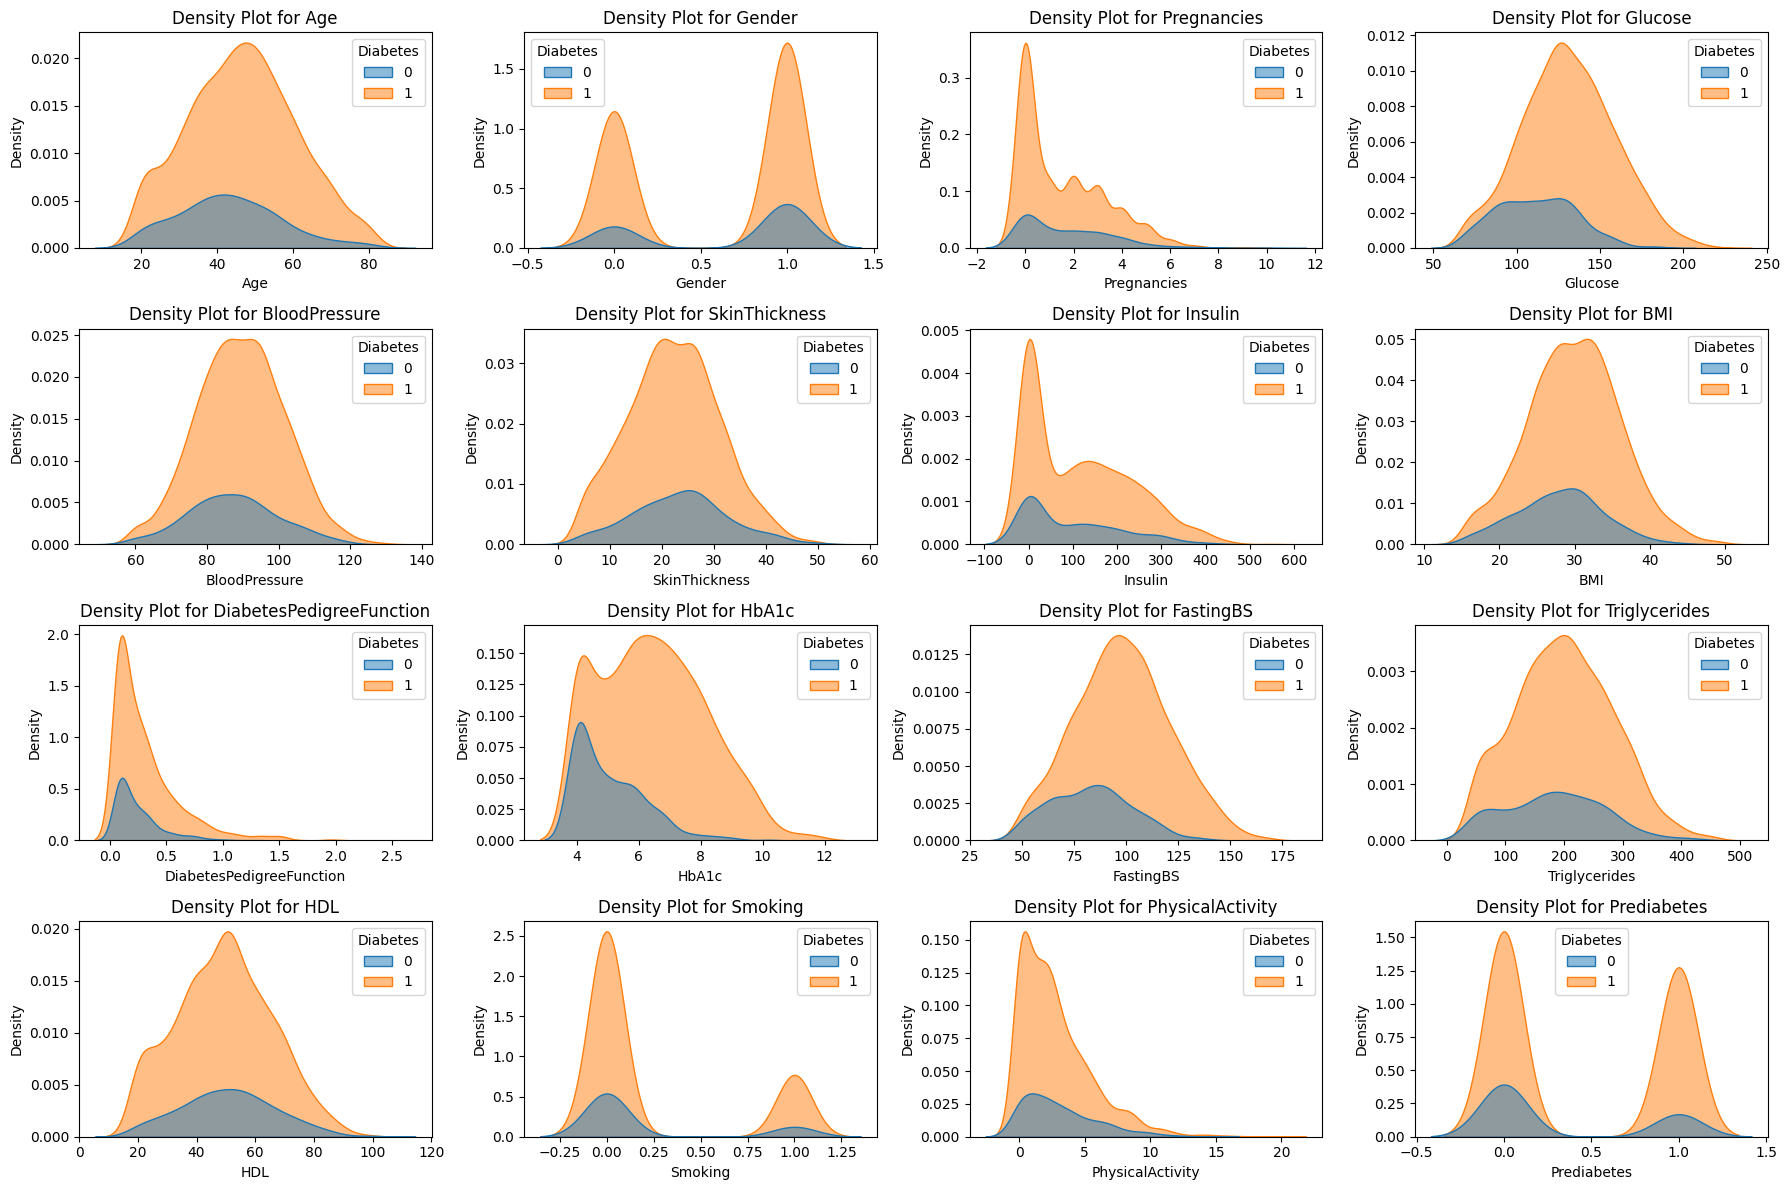

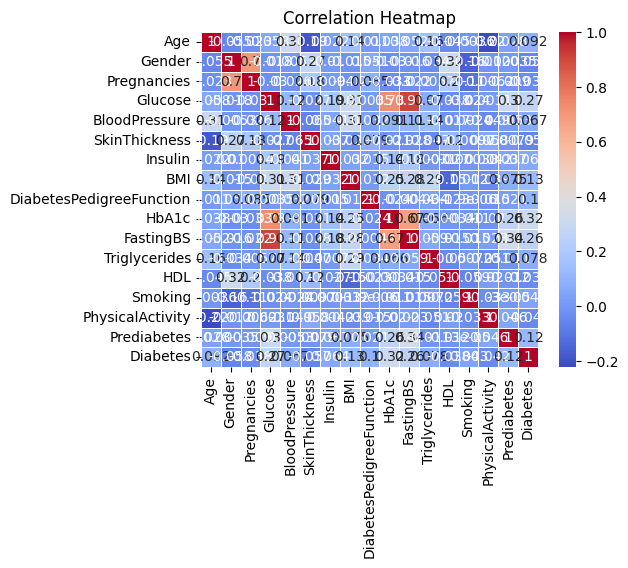

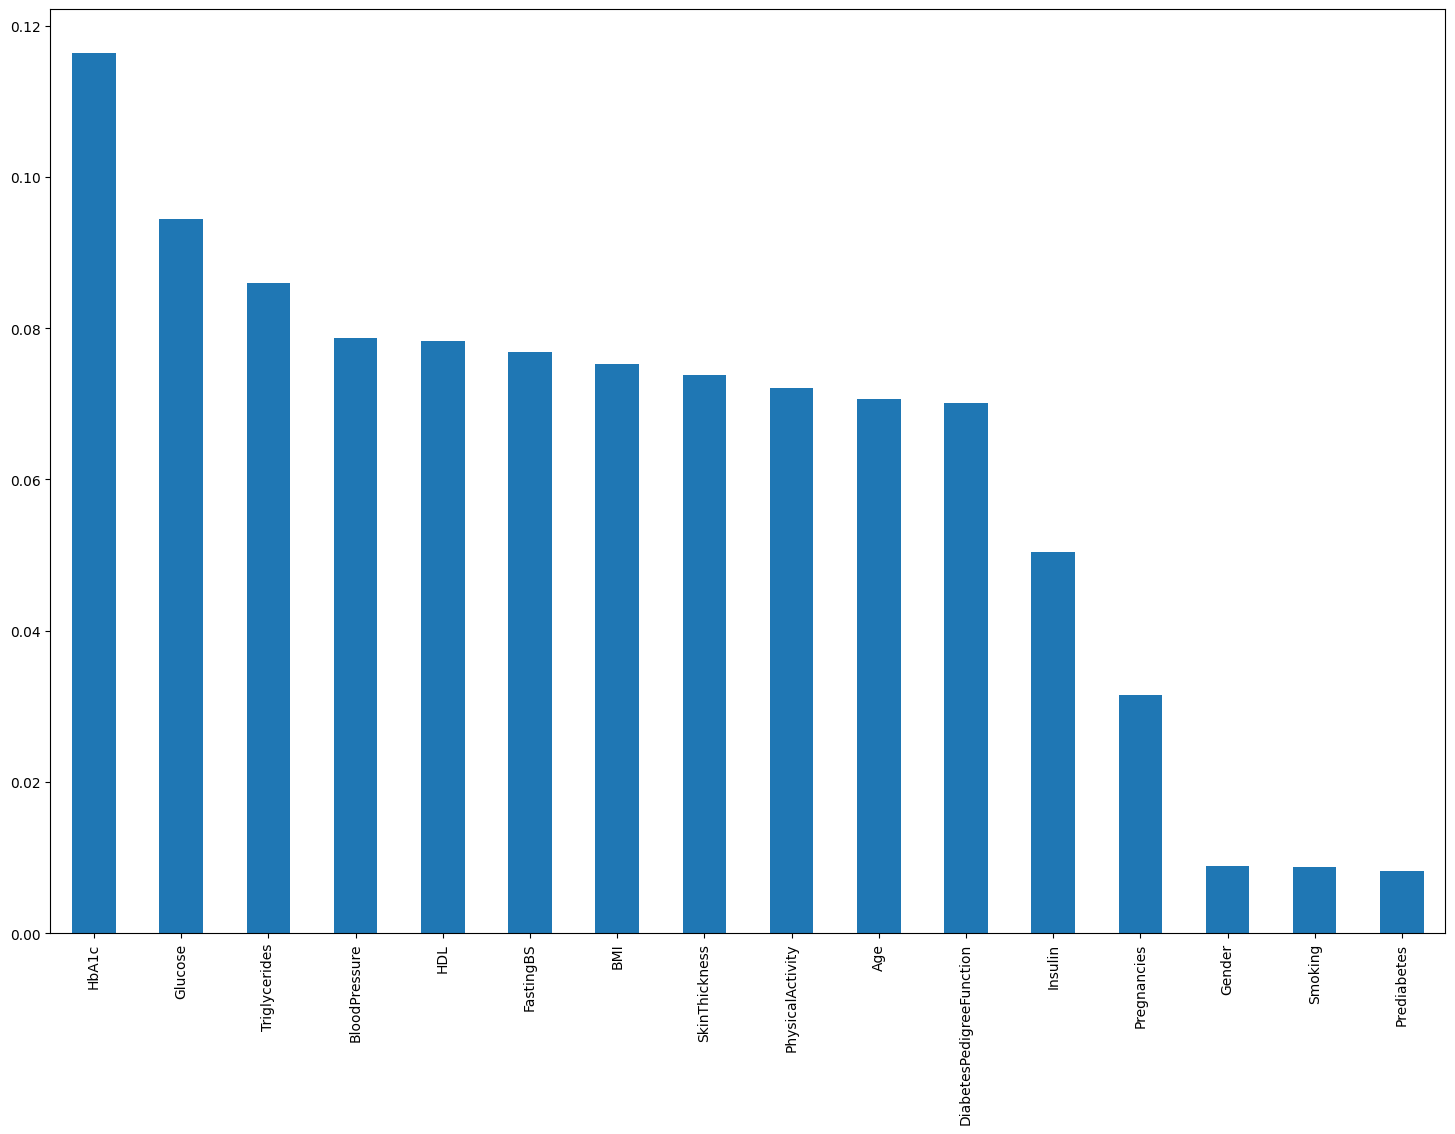

In [18]:
# Task 2: Data Visualization - EDA
def perform_eda(df):
    """
    Perform Exploratory Data Analysis on the customer dataset

    Parameters:
    df (pandas.DataFrame): Customer dataset
    """

    # 1. Create distribution plots comparing features between diabetic and non-diabetic patients
    plt.figure(figsize=(18, 12))
    for i, column in enumerate(df.columns[:16]):  # Skip Label column
      plt.subplot(4, 4, i+1)
      sns.kdeplot(data=df, x= column, hue='Diabetes', fill=True, alpha=0.5)
      plt.title(f'Density Plot for {column}')
      plt.xlabel(f'{column}')
      plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

    # 2. Correlation heatmap
    plt.figure(figsize=(25, 20))
    plt.subplot(4, 4, 4)
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')

    # 3. Distribution plots for variables
    # Create a figure for distribution plots
    plt.figure(figsize=(18, 12))
    model = RandomForestClassifier()
    X = df.iloc[:, :-1]
    y = df['Diabetes']

    model.fit(X, y)

    (pd.Series(model.feature_importances_, index=X.columns)
      .nlargest(16)
      .plot(kind='bar'))


perform_eda(df)

Missing values in each column:
Age                          0
Gender                       0
Pregnancies                  0
Glucose                      0
BloodPressure               84
SkinThickness               72
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
HbA1c                        0
FastingBS                    0
Triglycerides               77
HDL                         81
Smoking                      0
PhysicalActivity             0
Prediabetes                  0
Diabetes                     0
dtype: int64
Age                          0
Gender                       0
Pregnancies                  0
Glucose                      0
BloodPressure               84
SkinThickness               72
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
HbA1c                        0
FastingBS                    0
Triglycerides               77
HDL                         81
Smoking                   

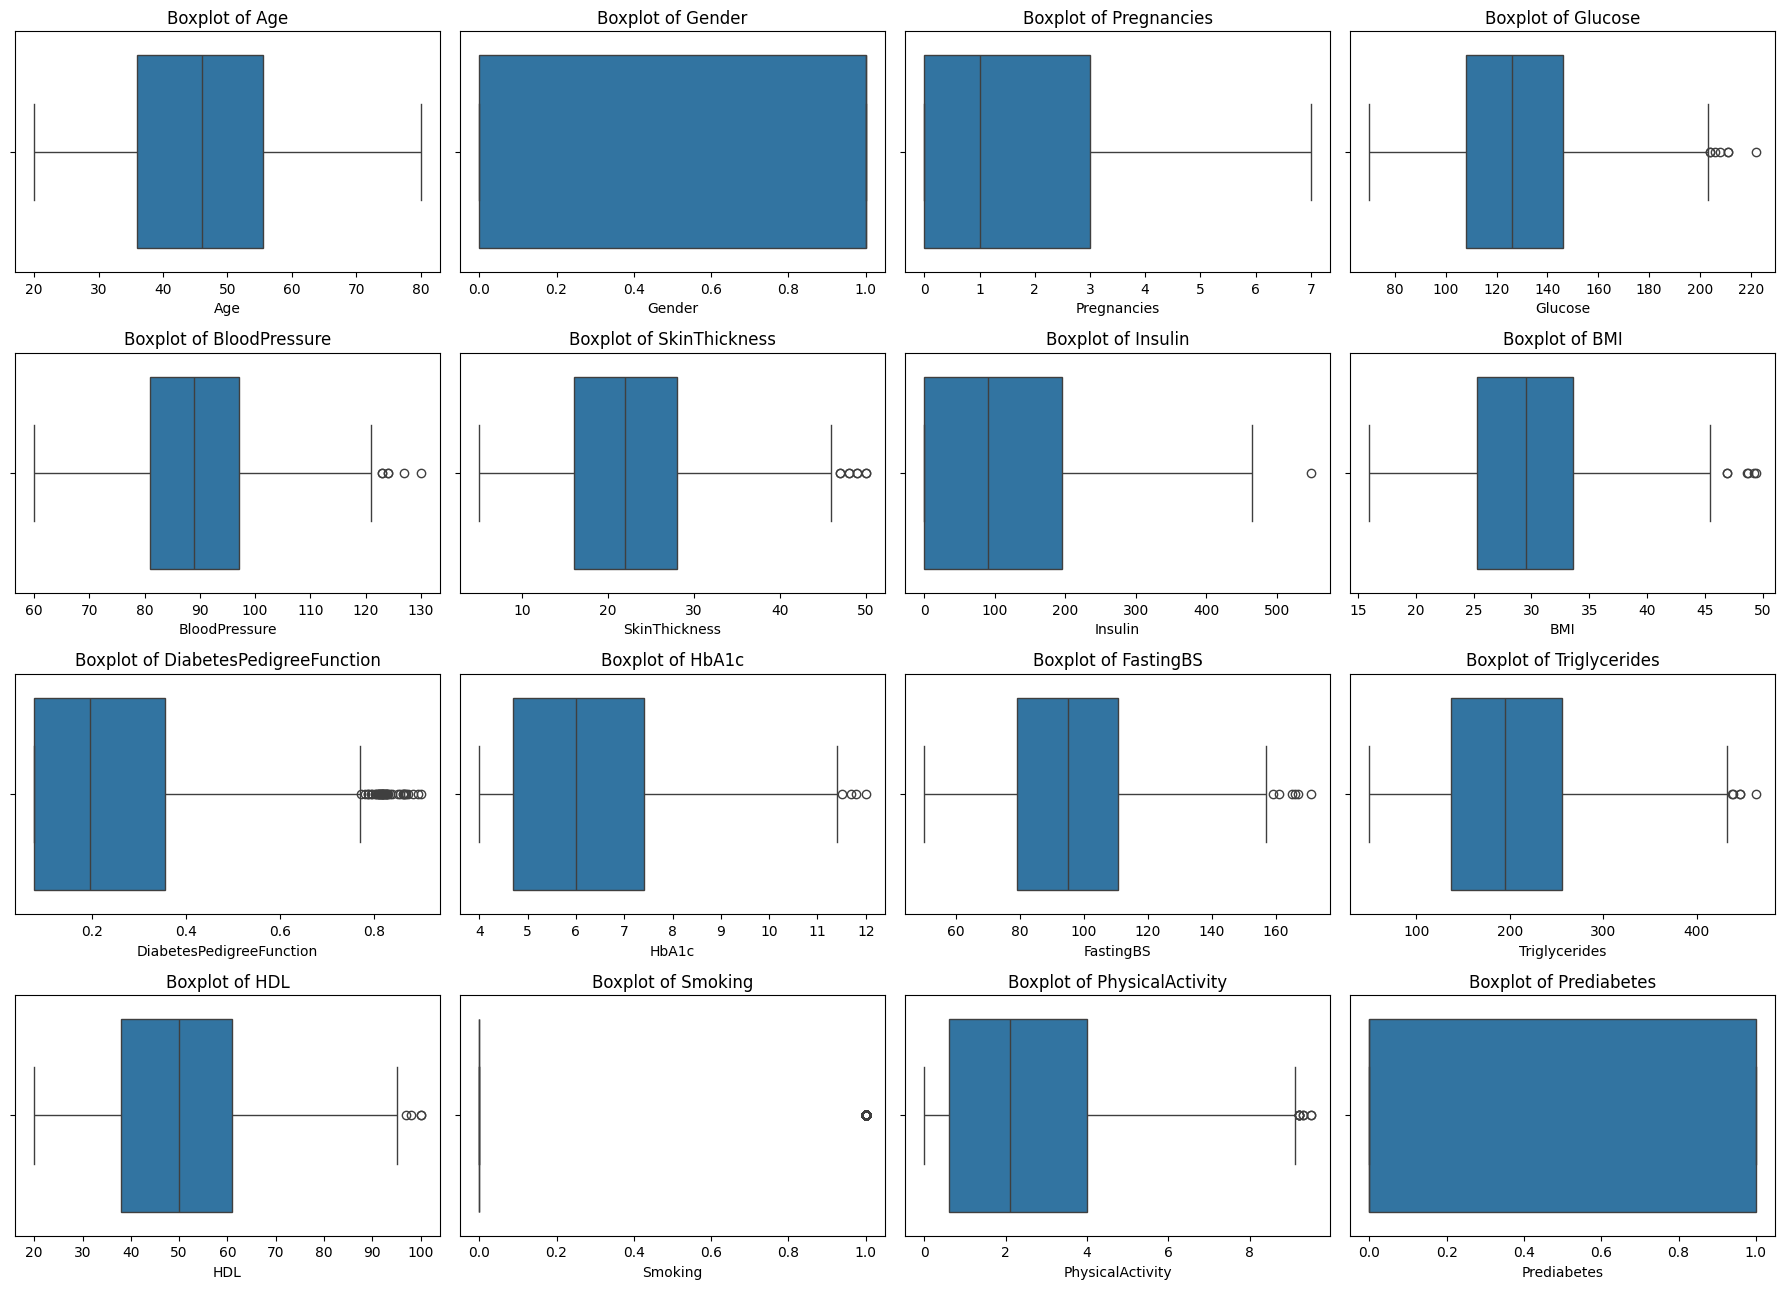

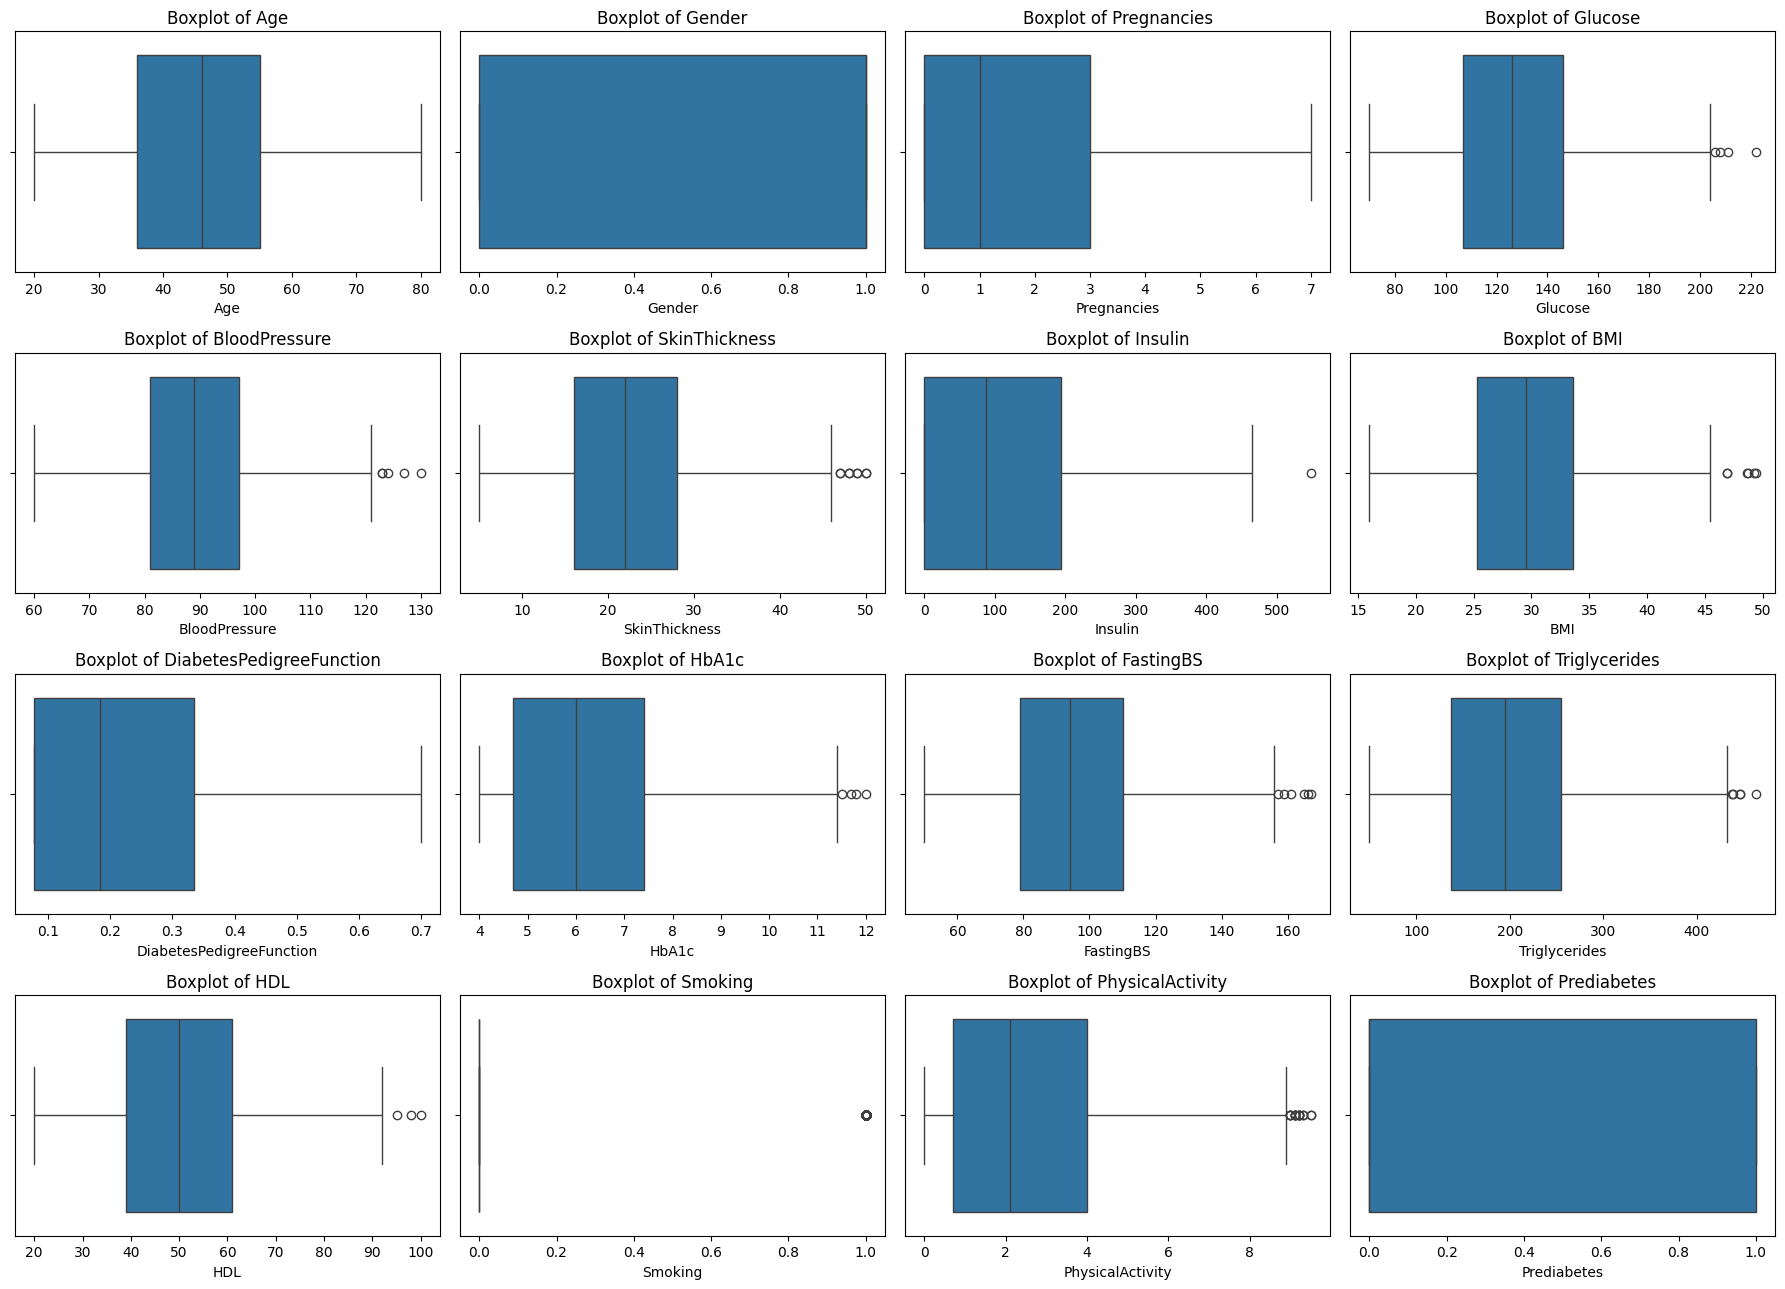

In [28]:
# Task 3: Check for missing values and handle outliers
def check_data_quality(df):
    """
    Check for missing values and outliers in the dataset

    Parameters:
    df (pandas.DataFrame): Customer dataset

    Returns:
    pandas.DataFrame: DataFrame with outliers handled (if any)
    """
    # Check for missing values
    print("Missing values in each column:")
    print(df.isnull().sum())
    df.fillna(df.mean(numeric_only=True))
    print(df.isnull().sum())

    # Visualize outliers using boxplots
    plt.figure(figsize=(18, 13))
    for i, column in enumerate(df.columns[:-1]):  # Skip Label column
        plt.subplot(4, 4, i+1)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

    # Handle outliers
    df = df[(df['Pregnancies'] <= 7)]
    df = df[(df['DiabetesPedigreeFunction'] <= 0.7)]
    df = df[(df['PhysicalActivity'] <= 9.5)]

    # Visualize after outliers are handled
    plt.figure(figsize=(18, 13))
    for i, column in enumerate(df.columns[:-1]):  # Skip Label column
        plt.subplot(4, 4, i+1)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()


    return df

df = check_data_quality(df)

In [39]:
# Task 4: Prepare Features and Target Variable
X = df.drop(df['Diabetes'])
y = df['Diabetes']

scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Standardize X_train and X_test
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform([y])

print(X_scaled)
print(y_scaled)

[[ 0.6457141   0.81018835  1.48227199 ... -1.12826073  1.1817579
  -1.97998838]
 [ 1.5705879   0.81018835  0.8923341  ...  0.63603009 -0.84619701
   0.50505347]
 [-0.35030384 -1.23428089 -0.87747955 ...  0.50693564 -0.84619701
   0.50505347]
 ...
 [-0.99060109 -1.23428089 -0.87747955 ...  2.01303757  1.1817579
   0.50505347]
 [-0.20801557  0.81018835  0.30239622 ...  1.36756532 -0.84619701
   0.50505347]
 [-0.84831281 -1.23428089 -0.87747955 ...  0.67906158  1.1817579
   0.50505347]]
[[0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#Task 5: Class Imbalance and Dataset Splitting


